In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from mlxtend.frequent_patterns import apriori, association_rules


In [2]:
path=r"C:\Users\win10\Desktop\DATA SCIENCE\ExcelR\Assignment Given (Untouched)\6)Association Rule\book.csv"

In [3]:
path=path.replace('\\', '/')

In [6]:
book=pd.read_csv(path,)

In [30]:
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [49]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [50]:
book.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
frequent_items=apriori(book, min_support=0.005, max_len=3,use_colnames = True)

frequent_items.sort_values('support',ascending=False,inplace=True)

rules=association_rules(frequent_items,metric='lift', min_threshold=1)

print(rules.sort_values('lift',ascending=False).head())


             antecedents          consequents  antecedent support  \
749    (RefBks, ItalArt)          (ItalAtlas)              0.0200   
752          (ItalAtlas)    (RefBks, ItalArt)              0.0370   
745            (ItalArt)  (ArtBks, ItalAtlas)              0.0485   
744  (ArtBks, ItalAtlas)            (ItalArt)              0.0180   
351   (ArtBks, ItalCook)            (ItalArt)              0.0565   

     consequent support  support  confidence       lift  leverage  conviction  
749              0.0370   0.0165    0.825000  22.297297  0.015760    5.502857  
752              0.0200   0.0165    0.445946  22.297297  0.015760    1.768780  
745              0.0180   0.0165    0.340206  18.900344  0.015627    1.488344  
744              0.0485   0.0165    0.916667  18.900344  0.015627   11.418000  
351              0.0485   0.0375    0.663717  13.684883  0.034760    2.829461  


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'support')

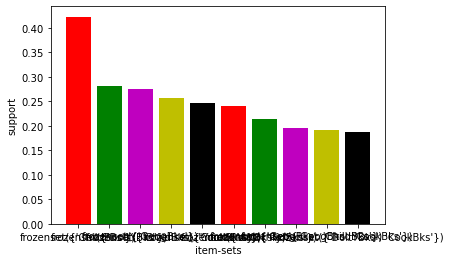

In [9]:
import matplotlib.pyplot as plt

plt.bar(x = list(range(1,11)),height = frequent_items.support[1:11],color='rgmyk');
plt.xticks(list(range(1,11)),frequent_items.itemsets[1:11])
plt.xlabel('item-sets');plt.ylabel('support')